Wczytanie i obróbka bazy danych:

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('ITsalary.csv', sep = ';')

In [4]:
df.head()

,Date,Age,Gender,Position,Experience,Seniority_level,Programming_language,Salary,Vacation_days,Employment_status,Contract_duration,Language,Company_size
0,24.11.2020 11:14,26,Male,Software Engineer,5,Senior,TypeScript,80000,30,Full-time employee,Unlimited contract,English,medium-size
1,24.11.2020 11:14,26,Male,Backend Developer,7,Senior,Ruby,80000,28,Full-time employee,Unlimited contract,English,large
2,24.11.2020 11:14,29,Male,Software Engineer,12,Lead,Javascript / Typescript,120000,30,Self-employed (freelancer),Temporary contract,English,large
3,24.11.2020 11:15,28,Male,Frontend Developer,4,Junior,Javascript,54000,24,Full-time employee,Unlimited contract,English,medium-size
4,24.11.2020 11:15,37,Male,Backend Developer,17,Senior,C# .NET,62000,29,Full-time employee,Unlimited contract,English,large


Unikatowe wartości dla zmiennych dyskretnych:

In [5]:
df1=pd.DataFrame()
a='Seniority_level'
df1['count']=df[a].value_counts()
df1['%']=df[a].value_counts()/df[a].count()*100
print(df1)

        count          %
Senior    503  47.097378
Middle    319  29.868914
Lead      148  13.857678
Junior     61   5.711610
Head       37   3.464419


In [6]:
df2=pd.DataFrame()
a='Employment_status'
df2['count']=df[a].value_counts()
df2['%']=df[a].value_counts()/df[a].count()*100
print(df2)

                            count          %
Full-time employee           1046  97.940075
Self-employed (freelancer)     18   1.685393
Part-time employee              4   0.374532


In [7]:
df3=pd.DataFrame()
a='Contract_duration'
df3['count']=df[a].value_counts()
df3['%']=df[a].value_counts()/df[a].count()*100
print(df3)

                    count          %
Unlimited contract   1020  95.505618
Temporary contract     48   4.494382


In [8]:
df4=pd.DataFrame()
a='Language'
df4['count']=df[a].value_counts()
df4['%']=df[a].value_counts()/df[a].count()*100
print(df4)

         count          %
English    895  83.801498
German     160  14.981273
Russian     10   0.936330
Italian      3   0.280899


In [9]:
df5=pd.DataFrame()
a='Company_size'
df5['count']=df[a].value_counts()
df5['%']=df[a].value_counts()/df[a].count()*100
print(df5)

             count          %
extra-large    388  36.329588
large          362  33.895131
small          149  13.951311
medium-size    126  11.797753
micro           43   4.026217


Rozkodowanie zmiennych:

In [10]:
df['Gender'] = (df['Gender'] == 'Male').astype(int)

In [11]:
df['Contract_duration'] = (df['Contract_duration'] == 'Unlimited contract').astype(int)

In [12]:
df['Employment_status']=df['Employment_status'].replace(['Part-time employee','Self-employed (freelancer)'],'Other')
df['Employment_status'] = (df['Employment_status'] == 'Full-time employee').astype(int)

In [13]:
df=pd.get_dummies(df,columns=['Seniority_level'], prefix='Seniority_level', drop_first=True)

In [14]:
df=pd.get_dummies(df,columns=['Company_size'], prefix='Company_size', drop_first=True)

In [15]:
df=pd.get_dummies(df,columns=['Language'], prefix='Language', drop_first=True)

In [16]:
df.head()

,Date,Age,Gender,Position,Experience,Programming_language,Salary,Vacation_days,Employment_status,Contract_duration,...,Seniority_level_Lead,Seniority_level_Middle,Seniority_level_Senior,Company_size_large,Company_size_medium-size,Company_size_micro,Company_size_small,Language_German,Language_Italian,Language_Russian
0,24.11.2020 11:14,26,1,Software Engineer,5,TypeScript,80000,30,1,1,...,0,0,1,0,1,0,0,0,0,0
1,24.11.2020 11:14,26,1,Backend Developer,7,Ruby,80000,28,1,1,...,0,0,1,1,0,0,0,0,0,0
2,24.11.2020 11:14,29,1,Software Engineer,12,Javascript / Typescript,120000,30,0,0,...,1,0,0,1,0,0,0,0,0,0
3,24.11.2020 11:15,28,1,Frontend Developer,4,Javascript,54000,24,1,1,...,0,0,0,0,1,0,0,0,0,0
4,24.11.2020 11:15,37,1,Backend Developer,17,C# .NET,62000,29,1,1,...,0,0,1,1,0,0,0,0,0,0


Wykres rozrzutu dla zmiennej Salary i Experience:

In [17]:
from pylab import *

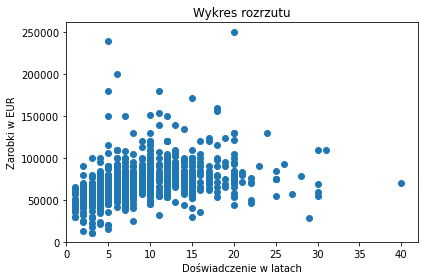

In [18]:
plot(df.Experience,df.Salary, 'o')
title('Wykres rozrzutu')
xlabel('Doświadczenie w latach')
ylabel('Zarobki w EUR')
axis(ymin=0, xmin=0)
tight_layout()
savefig('wykres_zarobkow.jpg')
show()

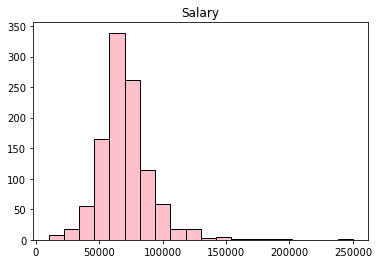

In [164]:
hist(df.Salary, bins = 20, edgecolor = 'black', color='pink')
title('Salary')
show()

Histogram zmiennej Salary przypomina rozkład normalny

Prosta regresja liniowa dla dwóch zmiennych:

In [20]:
import statsmodels.api as sm

In [21]:
y=df.Salary
x=df.Experience

In [22]:
model_1= sm.OLS(x,y).fit()

In [23]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Experience   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              3659.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):                        0.00
Time:                        21:44:45   Log-Likelihood:                         -3209.3
No. Observations:                1068   AIC:                                      6421.
Df Residuals:                    1067   BIC:                                      6426.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary         0.0001   2.01e-06     60.486      0.000       0.000       0.000
==============================================================================
Omnibus:                      284.364   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1226.454
Skew:                           1.189   Prob(JB):                    4.77e-267
Kurtosis:                       7.680   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y=df.Salary
x=sm.add_constant(df.Experience)

In [25]:
model_2 = sm.OLS(y,x).fit()

In [26]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           4.27e-35
Time:                        21:45:43   Log-Likelihood:                -12105.
No. Observations:                1068   AIC:                         2.421e+04
Df Residuals:                    1066   BIC:                         2.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.764e+04   1229.722     46.870      0.000    5.52e+04       6e+04
Experience  1533.7402    119.635     12.820      0.000    1298.994    1768.487
==============================================================================
Omnibus:                      572.483   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8688.353
Skew:                           2.109   Prob(JB):                         0.00
Kurtosis:                      16.321   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model_2.predict()

array([65305.49989355, 68372.98039268, 76041.68164049, ...,
       80642.90238917, 68372.98039268, 60704.27914487])

In [28]:
df['Predictions']= model_2.predict()
df.head()

,Date,Age,Gender,Position,Experience,Programming_language,Salary,Vacation_days,Employment_status,Contract_duration,...,Seniority_level_Middle,Seniority_level_Senior,Company_size_large,Company_size_medium-size,Company_size_micro,Company_size_small,Language_German,Language_Italian,Language_Russian,Predictions
0,24.11.2020 11:14,26,1,Software Engineer,5,TypeScript,80000,30,1,1,...,0,1,0,1,0,0,0,0,0,65305.499894
1,24.11.2020 11:14,26,1,Backend Developer,7,Ruby,80000,28,1,1,...,0,1,1,0,0,0,0,0,0,68372.980393
2,24.11.2020 11:14,29,1,Software Engineer,12,Javascript / Typescript,120000,30,0,0,...,0,0,1,0,0,0,0,0,0,76041.681640
3,24.11.2020 11:15,28,1,Frontend Developer,4,Javascript,54000,24,1,1,...,0,0,0,1,0,0,0,0,0,63771.759644
4,24.11.2020 11:15,37,1,Backend Developer,17,C# .NET,62000,29,1,1,...,0,1,1,0,0,0,0,0,0,83710.382888


In [29]:
model_2.params

const         57636.798646
Experience     1533.740250
dtype: float64

In [30]:
model_2.params[0]

57636.79864574465

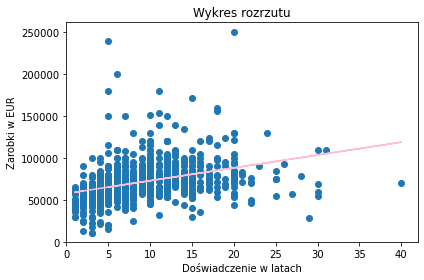

In [156]:
plot(df['Experience'],df['Salary'], 'o')
plt.plot(df['Experience'], df['Predictions'], color='pink')
title('Wykres rozrzutu')
xlabel('Doświadczenie w latach')
ylabel('Zarobki w EUR')
axis(ymin=0, xmin=0)
tight_layout()
savefig('wykres_zarobkow2.jpg')
show()

Sprzawdzenie dla zmiennych w logarytmach:

In [32]:
import numpy as np

In [33]:
df['lSalary']=np.log(df['Salary'])

In [34]:
df['lExperience']=np.log(df['Experience'])

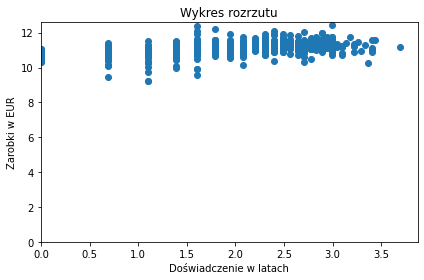

In [35]:
plot(df.lExperience,df.lSalary, 'o')
title('Wykres rozrzutu')
xlabel('Doświadczenie w latach')
ylabel('Zarobki w EUR')
axis(ymin=0, xmin=0)
tight_layout()
savefig('wykres_zarobkow.jpg')
show()

In [36]:
import wooldridge as w

In [39]:
list(df.columns)

['Date',
 'Age',
 'Gender',
 'Position ',
 'Experience',
 'Programming_language',
 'Salary',
 'Vacation_days',
 'Employment_status',
 'Contract_duration',
 'Seniority_level_Junior',
 'Seniority_level_Lead',
 'Seniority_level_Middle',
 'Seniority_level_Senior',
 'Company_size_large',
 'Company_size_medium_size',
 'Company_size_micro',
 'Company_size_small',
 'Language_German',
 'Language_Italian',
 'Language_Russian',
 'Predictions',
 'lSalary',
 'lExperience']

In [38]:
df.rename(columns={'Company_size_medium-size':'Company_size_medium_size'},inplace=True)

In [40]:
df['Salary'].describe()

count      1068.000000
mean      71253.769663
std       21747.780580
min       10001.000000
25%       60000.000000
50%       70000.000000
75%       80000.000000
max      250000.000000
Name: Salary, dtype: float64

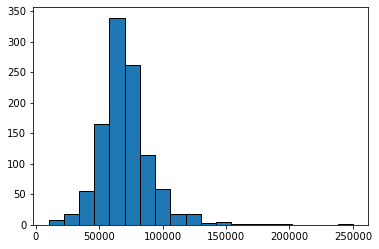

In [42]:
hist(df['Salary'], bins =20, edgecolor = 'black')
show()

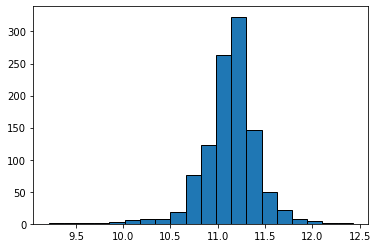

In [43]:
hist(df['lSalary'], bins =20, edgecolor = 'black')
show()

In [44]:
df_ciagle = df[['Salary','Age','Experience','Vacation_days']]

In [45]:
import seaborn as sns

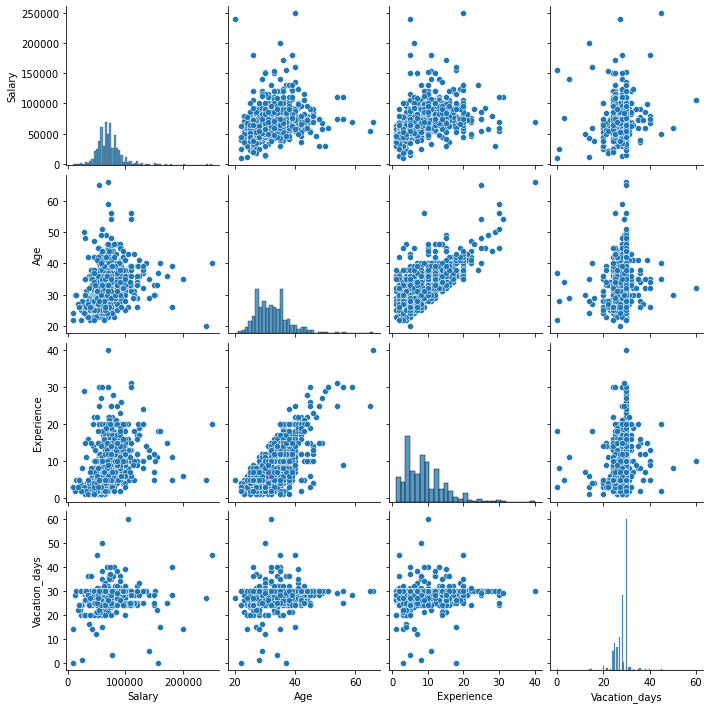

In [46]:
sns.pairplot(df_ciagle)

In [47]:
df_ciagle.corr(method = 'pearson')

,Salary,Age,Experience,Vacation_days
Salary,1.000000,0.227035,0.365493,0.100300
Age,0.227035,1.000000,0.724650,0.132579
Experience,0.365493,0.724650,1.000000,0.099723
Vacation_days,0.100300,0.132579,0.099723,1.000000


<AxesSubplot:>

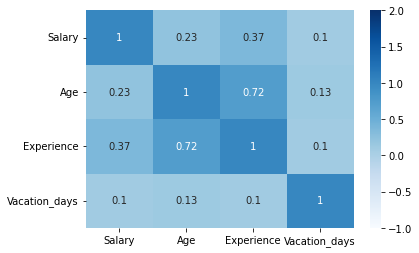

In [162]:
sns.heatmap(df_ciagle.corr(method = 'pearson'), vmin= -1, vmax= 2, annot = True, cmap='Blues')

Zauważalna jest silna dodatnia korelacja pomiędzy zmiennymi Age i Experience

Przeanalizujmy zmienne zerojedynkowe

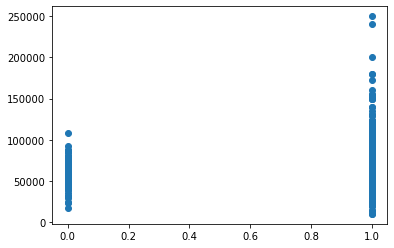

In [49]:
plot(df['Gender'], df['Salary'],'o')

Zaczynam tworzenie modelu regresji liniowej z wykorzystaniem wszystkich wybranych zmiennych:

In [50]:
import statsmodels.formula.api as smf

In [51]:
m1 = smf.ols(formula = 'Salary ~ Age + Gender + Experience + Vacation_days + Contract_duration + Seniority_level_Junior + Seniority_level_Lead + Seniority_level_Middle + Seniority_level_Senior + Employment_status + Company_size_large + Company_size_medium_size + Company_size_micro + Company_size_small + Language_German + Language_Italian + Language_Russian', data = df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     44.23
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          2.03e-110
Time:                        22:02:10   Log-Likelihood:                -11893.
No. Observations:                1068   AIC:                         2.382e+04
Df Residuals:                    1050   BIC:                         2.391e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.095e+05   7244.397     15.115      0.000    9.53e+04    1.24e+05
Age                       -120.1052    140.021     -0.858      0.391    -394.858     154.648
Gender                    6703.0948   1515.309      4.424      0.000    3729.715    9676.474
Experience                 502.4863    158.474      3.171      0.002     191.524     813.449
Vacation_days              427.2379    150.507      2.839      0.005     131.909     722.567
Contract_duration         2638.7054   2649.449      0.996      0.320   -2560.111    7837.522
Seniority_level_Junior   -4.212e+04   3735.432    -11.275      0.000   -4.94e+04   -3.48e+04
Seniority_level_Lead     -8601.5497   3098.480     -2.776      0.006   -1.47e+04   -2521.632
Seniority_level_Middle   -3.312e+04   3051.928    -10.854      0.000   -3.91e+04   -2.71e+04
Seniority_level_Senior   -2.182e+04   2891.619     -7.545      0.000   -2.75e+04   -1.61e+04
Employment_status        -2.958e+04   3908.002     -7.568      0.000   -3.72e+04   -2.19e+04
Company_size_large       -6947.8792   1233.768     -5.631      0.000   -9368.810   -4526.948
Company_size_medium_size -9779.5575   1728.715     -5.657      0.000   -1.32e+04   -6387.428
Company_size_micro       -1.371e+04   2812.454     -4.875      0.000   -1.92e+04   -8192.306
Company_size_small       -9727.6306   1651.344     -5.891      0.000    -1.3e+04   -6487.321
Language_German          -4249.3720   1526.815     -2.783      0.005   -7245.327   -1253.417
Language_Italian         -3.104e+04   9814.657     -3.163      0.002   -5.03e+04   -1.18e+04
Language_Russian         -1.796e+04   5360.789     -3.350      0.001   -2.85e+04   -7440.269
==============================================================================
Omnibus:                      606.934   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12167.908
Skew:                           2.186   Prob(JB):                         0.00
Kurtosis:                      18.947   Cond. No.                         856.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Selekcja zmiennych - Metoda od ogółu do szczegółu: 

Pierwszą zmienną, którą będę weryfikować jest zmienna Age

In [58]:
hip1 = '(Age = 0)'

In [59]:
m1.f_test(hip1)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.7357618752620921, p=0.3912176362684765, df_denom=1.05e+03, df_num=1>

Brak podstaw do odrzucenia Ho o braku istotności zmiennej w modelu.

Zmienna Age zostaje usunięta z modelu.

In [61]:
m2 = smf.ols(formula = 'Salary ~ Gender + Experience + Vacation_days + Contract_duration + Seniority_level_Junior + Seniority_level_Lead + Seniority_level_Middle + Seniority_level_Senior + Employment_status + Company_size_large + Company_size_medium_size + Company_size_micro + Company_size_small + Language_German + Language_Italian + Language_Russian', data = df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     46.96
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          4.17e-111
Time:                        22:13:43   Log-Likelihood:                -11893.
No. Observations:                1068   AIC:                         2.382e+04
Df Residuals:                    1051   BIC:                         2.391e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.066e+05   6427.232     16.591      0.000     9.4e+04    1.19e+05
Gender                    6760.3081   1513.650      4.466      0.000    3790.187    9730.429
Experience                 412.6144    118.882      3.471      0.001     179.341     645.887
Vacation_days              418.6396    150.154      2.788      0.005     124.004     713.276
Contract_duration         2651.7623   2649.072      1.001      0.317   -2546.309    7849.834
Seniority_level_Junior   -4.204e+04   3733.821    -11.259      0.000   -4.94e+04   -3.47e+04
Seniority_level_Lead     -8502.6728   3095.946     -2.746      0.006   -1.46e+04   -2427.735
Seniority_level_Middle   -3.302e+04   3048.907    -10.829      0.000    -3.9e+04    -2.7e+04
Seniority_level_Senior   -2.174e+04   2889.917     -7.523      0.000   -2.74e+04   -1.61e+04
Employment_status        -2.965e+04   3906.568     -7.590      0.000   -3.73e+04    -2.2e+04
Company_size_large       -7006.6815   1231.707     -5.689      0.000   -9423.566   -4589.797
Company_size_medium_size -9884.1711   1724.191     -5.733      0.000   -1.33e+04   -6500.923
Company_size_micro       -1.376e+04   2811.572     -4.893      0.000   -1.93e+04   -8240.788
Company_size_small       -9756.2632   1650.799     -5.910      0.000    -1.3e+04   -6517.026
Language_German          -4483.1854   1502.096     -2.985      0.003   -7430.634   -1535.737
Language_Italian         -3.102e+04   9813.383     -3.161      0.002   -5.03e+04   -1.18e+04
Language_Russian         -1.822e+04   5351.444     -3.405      0.001   -2.87e+04   -7720.069
==============================================================================
Omnibus:                      609.848   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12374.385
Skew:                           2.197   Prob(JB):                         0.00
Kurtosis:                      19.086   Cond. No.                         575.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sprawdzam kolejną zmienną - Contract_duration

In [64]:
hip2 = '(Age = 0), (Contract_duration = 0)'

In [65]:
m1.f_test(hip2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.8687711101228868, p=0.4197680089261323, df_denom=1.05e+03, df_num=2>

Brak podstaw do odrzucenia Ho o braku istotności zmiennej w modelu.

Zmienna Contract_duration zostaje usunięta z modelu.

In [73]:
m3 = smf.ols(formula = 'Salary ~ Gender + Experience + Vacation_days + Seniority_level_Junior + Seniority_level_Lead + Seniority_level_Middle + Seniority_level_Senior + Employment_status + Company_size_large + Company_size_medium_size + Company_size_micro + Company_size_small + Language_German + Language_Italian + Language_Russian', data = df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     50.02
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          9.46e-112
Time:                        22:19:18   Log-Likelihood:                -11894.
No. Observations:                1068   AIC:                         2.382e+04
Df Residuals:                    1052   BIC:                         2.390e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.082e+05   6240.454     17.334      0.000    9.59e+04     1.2e+05
Gender                    6726.5817   1513.277      4.445      0.000    3757.197    9695.966
Experience                 416.3331    118.824      3.504      0.000     183.174     649.492
Vacation_days              419.9964    150.148      2.797      0.005     125.372     714.620
Seniority_level_Junior   -4.233e+04   3722.452    -11.372      0.000   -4.96e+04    -3.5e+04
Seniority_level_Lead     -8637.7422   3093.007     -2.793      0.005   -1.47e+04   -2568.577
Seniority_level_Middle   -3.321e+04   3042.976    -10.912      0.000   -3.92e+04   -2.72e+04
Seniority_level_Senior   -2.191e+04   2884.869     -7.595      0.000   -2.76e+04   -1.63e+04
Employment_status        -2.848e+04   3728.552     -7.639      0.000   -3.58e+04   -2.12e+04
Company_size_large       -7000.9007   1231.695     -5.684      0.000   -9417.758   -4584.043
Company_size_medium_size -9921.0305   1723.799     -5.755      0.000   -1.33e+04   -6538.555
Company_size_micro       -1.402e+04   2798.868     -5.011      0.000   -1.95e+04   -8532.992
Company_size_small       -9807.4354   1650.009     -5.944      0.000    -1.3e+04   -6569.752
Language_German          -4472.5035   1502.060     -2.978      0.003   -7419.878   -1525.129
Language_Italian         -3.182e+04   9780.706     -3.253      0.001    -5.1e+04   -1.26e+04
Language_Russian         -1.811e+04   5350.305     -3.385      0.001   -2.86e+04   -7611.564
==============================================================================
Omnibus:                      604.644   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12114.177
Skew:                           2.175   Prob(JB):                         0.00
Kurtosis:                      18.916   Cond. No.                         572.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Na poziomie istotności 5% brak podstaw do weryfikacji istotności pozostałych zmiennych.

Testy diagnostyczne:

Liniowość w modelu - test RESET:

In [83]:
import statsmodels.stats.api as sms

In [78]:
sms.linear_reset(m3, power = 3, test_type = 'fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=596.6751083058348, p-value=2.714229003128235e-130, df_denom=2>

In [79]:
sms.linear_reset(m3, power = 3 , test_type = 'exog')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=10.045637385489952, p-value=0.03966590320647751, df_denom=4>

Na poziomie istotności 5% odrzucamy hipotezę o liniowości w modelu.

Forma funkcjyjna w modelu nie jest poprawna.

Próba naprawienia formy funkcyjnej:

Do modelu dodaje logarytm zmiennej objaśnianej oraz zmiennej objaśniającej - Experience

In [81]:
m4 = smf.ols(formula = 'lSalary ~ Gender + lExperience + Vacation_days + Seniority_level_Junior + Seniority_level_Lead + Seniority_level_Middle + Seniority_level_Senior + Employment_status + Company_size_large + Company_size_medium_size + Company_size_micro + Company_size_small + Language_German + Language_Italian + Language_Russian', data = df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lSalary   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     59.56
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          6.52e-129
Time:                        22:32:27   Log-Likelihood:                 78.951
No. Observations:                1068   AIC:                            -125.9
Df Residuals:                    1052   BIC:                            -46.33
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   11.1849      0.088    127.011      0.000      11.012      11.358
Gender                       0.0864      0.021      4.213      0.000       0.046       0.127
lExperience                  0.0683      0.014      4.779      0.000       0.040       0.096
Vacation_days                0.0102      0.002      5.028      0.000       0.006       0.014
Seniority_level_Junior      -0.5721      0.053    -10.785      0.000      -0.676      -0.468
Seniority_level_Lead        -0.1085      0.042     -2.592      0.010      -0.191      -0.026
Seniority_level_Middle      -0.4245      0.041    -10.281      0.000      -0.506      -0.343
Seniority_level_Senior      -0.2563      0.039     -6.582      0.000      -0.333      -0.180
Employment_status           -0.1770      0.050     -3.508      0.000      -0.276      -0.078
Company_size_large          -0.0788      0.017     -4.726      0.000      -0.111      -0.046
Company_size_medium_size    -0.1251      0.023     -5.364      0.000      -0.171      -0.079
Company_size_micro          -0.2173      0.038     -5.727      0.000      -0.292      -0.143
Company_size_small          -0.1362      0.022     -6.102      0.000      -0.180      -0.092
Language_German             -0.0577      0.020     -2.859      0.004      -0.097      -0.018
Language_Italian            -0.5569      0.132     -4.209      0.000      -0.817      -0.297
Language_Russian            -0.4983      0.072     -6.880      0.000      -0.640      -0.356
==============================================================================
Omnibus:                      233.643   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2433.221
Skew:                          -0.687   Prob(JB):                         0.00
Kurtosis:                      10.266   Cond. No.                         546.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ponownie weryfikuję test na liniowość formy funkcyjnej. 

In [84]:
sms.linear_reset(m4, power = 3, test_type = 'fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=2.560167181652016, p-value=0.2780140600569437, df_denom=2>

Na poziomie istotniści 5% brak podstaw do odrzucenia hipotezy o liniowości w modelu.

Test chowa:

In [105]:
m4.ssr

53.93704658713193

In [109]:
m4_1 = smf.ols(formula = 'lSalary ~ Gender + lExperience + Vacation_days + Seniority_level_Junior + Seniority_level_Lead + Seniority_level_Middle + Seniority_level_Senior + Employment_status + Company_size_large + Company_size_medium_size + Company_size_micro + Company_size_small + Language_German + Language_Italian + Language_Russian', data = df[df['Gender'] == 1]).fit()
m4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lSalary   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     52.41
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          4.25e-106
Time:                        23:49:19   Log-Likelihood:                 60.184
No. Observations:                 910   AIC:                            -90.37
Df Residuals:                     895   BIC:                            -18.17
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.6643      0.046    121.973      0.000       5.573       5.755
Gender                       5.6643      0.046    121.973      0.000       5.573       5.755
lExperience                  0.0767      0.016      4.857      0.000       0.046       0.108
Vacation_days                0.0094      0.002      4.412      0.000       0.005       0.014
Seniority_level_Junior      -0.5875      0.058    -10.096      0.000      -0.702      -0.473
Seniority_level_Lead        -0.0993      0.043     -2.312      0.021      -0.184      -0.015
Seniority_level_Middle      -0.4204      0.043     -9.780      0.000      -0.505      -0.336
Seniority_level_Senior      -0.2527      0.040     -6.326      0.000      -0.331      -0.174
Employment_status           -0.2330      0.057     -4.090      0.000      -0.345      -0.121
Company_size_large          -0.0818      0.018     -4.469      0.000      -0.118      -0.046
Company_size_medium_size    -0.1203      0.025     -4.767      0.000      -0.170      -0.071
Company_size_micro          -0.2364      0.041     -5.800      0.000      -0.316      -0.156
Company_size_small          -0.1360      0.024     -5.589      0.000      -0.184      -0.088
Language_German             -0.0606      0.023     -2.630      0.009      -0.106      -0.015
Language_Italian            -0.5512      0.134     -4.124      0.000      -0.814      -0.289
Language_Russian            -0.4976      0.073     -6.806      0.000      -0.641      -0.354
==============================================================================
Omnibus:                      214.364   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2514.057
Skew:                          -0.717   Prob(JB):                         0.00
Kurtosis:                      11.016   Cond. No.                     3.09e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.73e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [110]:
m4_1.ssr

46.67897905028434

In [111]:
m4_2 = smf.ols(formula = 'lSalary ~ Gender + lExperience + Vacation_days + Seniority_level_Junior + Seniority_level_Lead + Seniority_level_Middle + Seniority_level_Senior + Employment_status + Company_size_large + Company_size_medium_size + Company_size_micro + Company_size_small + Language_German + Language_Italian + Language_Russian', data = df[df['Gender'] == 0]).fit()
m4_2.summary()

/Users/monika/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lSalary   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     6.663
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.95e-09
Time:                        23:49:25   Log-Likelihood:                 29.841
No. Observations:                 158   AIC:                            -33.68
Df Residuals:                     145   BIC:                             6.133
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.6123      0.327     32.422      0.000       9.965      11.259
Gender                   -5.003e-16   2.23e-16     -2.246      0.026   -9.41e-16      -6e-17
lExperience                  0.0125      0.033      0.380      0.705      -0.053       0.078
Vacation_days                0.0243      0.007      3.447      0.001       0.010       0.038
Seniority_level_Junior      -0.5298      0.224     -2.370      0.019      -0.972      -0.088
Seniority_level_Lead        -0.1640      0.225     -0.730      0.466      -0.608       0.280
Seniority_level_Middle      -0.3621      0.216     -1.678      0.095      -0.788       0.064
Seniority_level_Senior      -0.1956      0.217     -0.901      0.369      -0.625       0.233
Employment_status            0.0334      0.111      0.302      0.763      -0.186       0.253
Company_size_large          -0.0624      0.040     -1.569      0.119      -0.141       0.016
Company_size_medium_size    -0.1428      0.062     -2.318      0.022      -0.265      -0.021
Company_size_micro          -0.0801      0.110     -0.730      0.466      -0.297       0.137
Company_size_small          -0.1239      0.058     -2.149      0.033      -0.238      -0.010
Language_German             -0.0563      0.043     -1.312      0.192      -0.141       0.029
Language_Italian                  0          0        nan        nan           0           0
Language_Russian                  0          0        nan        nan           0           0
==============================================================================
Omnibus:                       61.492   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.803
Skew:                          -1.472   Prob(JB):                     5.07e-48
Kurtosis:                       7.942   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
m4_2.ssr

6.340698901326631

In [113]:
m4.nobs

1068.0

In [114]:
len(m4.params)

16

In [115]:
licznik = (m4.ssr - m4_1.ssr - m4_2.ssr)/len(m4.params)*(2-1)

In [117]:
mianownik = (m4_1.ssr + m4_2.ssr)/(m4.nobs - 2*len(m4.params))

In [118]:
F = licznik/mianownik

In [119]:
F

1.1203315720663922

In [120]:
import scipy.stats

In [121]:
scipy.stats.f.ppf(q = 1-0.05, dfn = len(m4.params)*(2-1), dfd = (m4.nobs - 2*len(m4.params)))

1.6532769196834838

(1.65; +niesk)

Nasza statytyka testowa nie wpada do obszaru krytycznego, więc brak podstaw do odrzucenia HO - parametry w podpróbkach są stabilne.

Kolejne testy diagnostyczne: Normalność składnika losowego:

Graficznie:

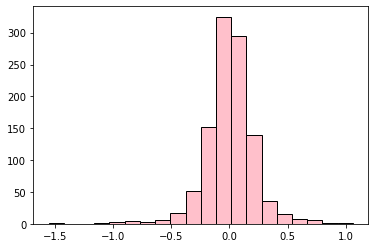

In [165]:
hist(m4.resid, bins = 20, color = 'pink', edgecolor = 'black')
show()

Po lewej stronie wykresu na poziomie -1.5 widoczna wartość, która może wpływać na brak rozkładu normalnego składnika losowego.

In [125]:
import statsmodels.api as sm

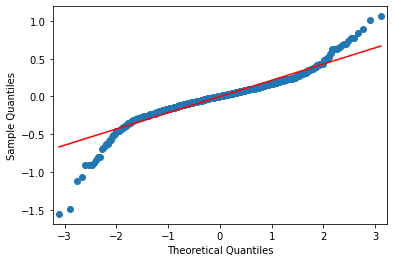

In [174]:
sm.qqplot(m4.resid, line = 'r')
show()

Wszystkie punkty powinny być równomiernie rozłożone na czerwonej lini - widoczne zaburzenia na obu końcach - jednak mamy dużą próbę, więc brak spełnienia założenia o normalności składnika losowego nie jest dla nas problemem.

Formalny test na normalność składnika losowego - Jargue-Bera:

In [127]:
test5 = sms.jarque_bera(m4.resid)
test5

(2433.220564617553, 0.0, -0.6873035040299572, 10.265643081312415)

In [128]:
nam2 = ['The Jarque-Bera test statistic', 'p-value', 'skewness', 'kurtosis']

In [129]:
lzip(nam2, test5)

[('The Jarque-Bera test statistic', 2433.220564617553),
 ('p-value', 0.0),
 ('skewness', -0.6873035040299572),
 ('kurtosis', 10.265643081312415)]

Skośność powinna być równa 0 a kurtoza równa 3. W modelu wartości te przymuja wartość -0,69 oraz 10,27, co wskazuje na brak normalności składnika losowego.

P-value równe 0 - odrzucamy hipotezę o normalności rozkładu reszt.

Kolejne testy diagnostyczne:

Homoskedastyczność składnika losowego:

Graficznie:

In [86]:
from pylab import *

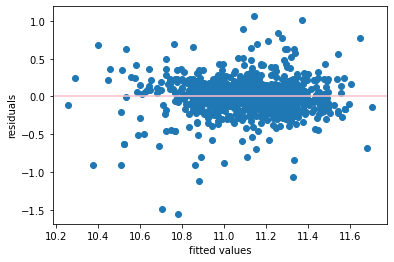

In [171]:
scatter(m4.fittedvalues, m4.resid)
axhline(y = 0, color = 'pink')
xlabel('fitted values')
ylabel('residuals')
show()

Wartość oczekiwana reszt powinna być równa 0 - oczekujemy w miarę równo rozłożonych punktów wokół 0.

Punkty na poziomie -1.5 mogą wskazywać na problem z homoskedastycznością.

In [89]:
import seaborn as sns

In [90]:
df['residuals'] = m4.resid
df['predictions'] = m4.predict()
df.head()

,Date,Age,Gender,Position,Experience,Programming_language,Salary,Vacation_days,Employment_status,Contract_duration,...,Company_size_micro,Company_size_small,Language_German,Language_Italian,Language_Russian,Predictions,lSalary,lExperience,residuals,predictions
0,24.11.2020 11:14,26,1,Software Engineer,5,TypeScript,80000,30,1,1,...,0,0,0,0,0,65305.499894,11.289782,1.609438,0.160297,11.129485
1,24.11.2020 11:14,26,1,Backend Developer,7,Ruby,80000,28,1,1,...,0,0,0,0,0,68372.980393,11.289782,1.945910,0.111440,11.178342
2,24.11.2020 11:14,29,1,Software Engineer,12,Javascript / Typescript,120000,30,0,0,...,0,0,0,0,0,76041.681640,11.695247,2.484907,0.134835,11.560412
3,24.11.2020 11:15,28,1,Frontend Developer,4,Javascript,54000,24,1,1,...,0,0,0,0,0,63771.759644,10.896739,1.386294,0.159694,10.737045
4,24.11.2020 11:15,37,1,Backend Developer,17,C# .NET,62000,29,1,1,...,0,0,0,0,0,83710.382888,11.034890,2.833213,-0.214277,11.249166


<AxesSubplot:xlabel='predictions', ylabel='residuals'>

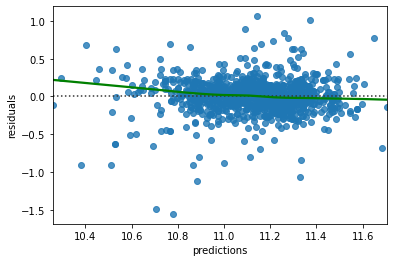

In [91]:
sns.residplot(data = df, x = 'predictions' , y = 'residuals', lowess = True, line_kws = dict(color = 'g'))

Zielona linia wskazuje na wygładzony wykres rozrzutu. 

Oddalenie zielonej lini od lini kropkowanej może wskazywać na brak liniowości w modelu.

Formalne testy statystyczne na weryfikację homoskedastyczności składnika losowego:

Test Breuscha-Pagana:

In [94]:
import statsmodels.stats.api as sms

In [95]:
test1 = sms.het_breuschpagan(m4.resid, m4.model.exog)
test1

(292.46403950110033,
 2.0534689738592869e-53,
 26.44813266576171,
 4.949668166001137e-63)

In [96]:
from statsmodels.compat import lzip

In [97]:
nam1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

In [98]:
lzip(nam1, test1)

[('lagrange multiplier statistic', 292.46403950110033),
 ('p-value', 2.0534689738592869e-53),
 ('f-value', 26.44813266576171),
 ('f p-value', 4.949668166001137e-63)]

Odrzucamy hipotezę zerową o homoskedastyczności na rzecz hipotezy alternatywnej. 

Test White'a:

In [99]:
test2 = sms.het_white(m4.resid, m4.model.exog)
test2

(632.2863672631796,
 5.770535199228782e-82,
 15.563995442023906,
 1.392747405287458e-135)

In [100]:
lzip(nam1, test2)

[('lagrange multiplier statistic', 632.2863672631796),
 ('p-value', 5.770535199228782e-82),
 ('f-value', 15.563995442023906),
 ('f p-value', 1.392747405287458e-135)]

Próby rozwiązania problemu z heteroskedastycznością.

Stosuje macierz odporną WHITE'A:

In [102]:
m5 = smf.ols(formula = 'lSalary ~ Gender + lExperience + Vacation_days + Seniority_level_Junior + Seniority_level_Lead + Seniority_level_Middle + Seniority_level_Senior + Employment_status + Company_size_large + Company_size_medium_size + Company_size_micro + Company_size_small + Language_German + Language_Italian + Language_Russian', data = df).fit(cov_type = 'HC0')
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lSalary   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     47.13
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          2.78e-106
Time:                        23:00:45   Log-Likelihood:                 78.951
No. Observations:                1068   AIC:                            -125.9
Df Residuals:                    1052   BIC:                            -46.33
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   11.1849      0.230     48.614      0.000      10.734      11.636
Gender                       0.0864      0.019      4.563      0.000       0.049       0.123
lExperience                  0.0683      0.015      4.580      0.000       0.039       0.098
Vacation_days                0.0102      0.005      2.118      0.034       0.001       0.020
Seniority_level_Junior      -0.5721      0.063     -9.056      0.000      -0.696      -0.448
Seniority_level_Lead        -0.1085      0.044     -2.454      0.014      -0.195      -0.022
Seniority_level_Middle      -0.4245      0.043     -9.916      0.000      -0.508      -0.341
Seniority_level_Senior      -0.2563      0.041     -6.284      0.000      -0.336      -0.176
Employment_status           -0.1770      0.137     -1.289      0.197      -0.446       0.092
Company_size_large          -0.0788      0.015     -5.362      0.000      -0.108      -0.050
Company_size_medium_size    -0.1251      0.022     -5.719      0.000      -0.168      -0.082
Company_size_micro          -0.2173      0.056     -3.862      0.000      -0.328      -0.107
Company_size_small          -0.1362      0.025     -5.401      0.000      -0.186      -0.087
Language_German             -0.0577      0.020     -2.852      0.004      -0.097      -0.018
Language_Italian            -0.5569      0.103     -5.413      0.000      -0.759      -0.355
Language_Russian            -0.4983      0.205     -2.435      0.015      -0.899      -0.097
==============================================================================
Omnibus:                      233.643   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2433.221
Skew:                          -0.687   Prob(JB):                         0.00
Kurtosis:                      10.266   Cond. No.                         546.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [103]:
from stargazer.stargazer import Stargazer

In [104]:
Stargazer([m1, m2, m3, m4, m5])

Obserwacje nietypowe i błędne:

In [130]:
import matplotlib.pyplot as plt

In [150]:
plt.rc('figure', figsize = (6,4))

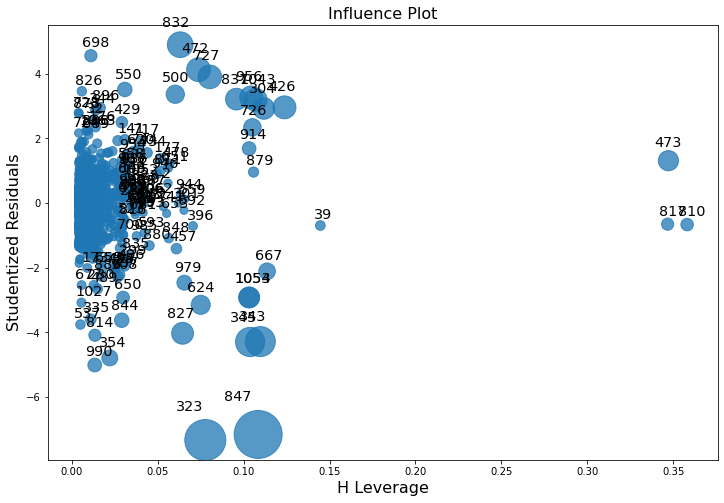

In [133]:
sm.graphics.influence_plot(m4, criterion = 'Cooks')
show()

In [134]:
h_lev = (2*len(m4.params))/m4.nobs
round(h_lev, 2)

0.03

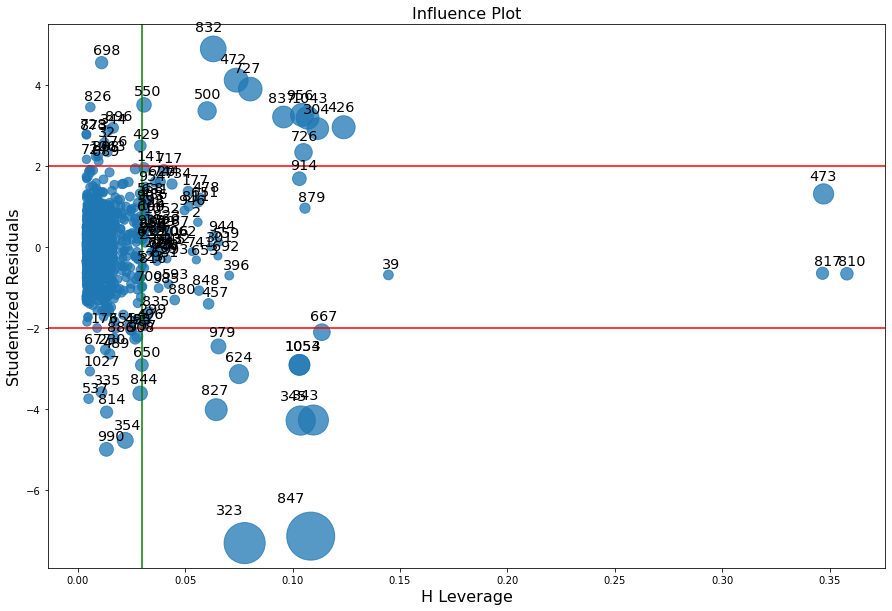

In [137]:
sm.graphics.influence_plot(m4, criterion = 'Cooks')
axvline(x = round(h_lev, 2), color = 'g')
axhline(y=2, color = 'r')
axhline(y=-2, color = 'r')
show()

Obserwacjami nietypowymi okazują się kilka obserwacji - 9 w dolnej części wykresu oraz 10 w górnej części wykresu

Obserwacje nietypowe ze wzgledu na wysokie reszty. Należy im się dokładnie przyjżeć 

Sprawdzenie współliniowości:

In [138]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lSalary   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     59.56
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          6.52e-129
Time:                        00:26:49   Log-Likelihood:                 78.951
No. Observations:                1068   AIC:                            -125.9
Df Residuals:                    1052   BIC:                            -46.33
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   11.1849      0.088    127.011      0.000      11.012      11.358
Gender                       0.0864      0.021      4.213      0.000       0.046       0.127
lExperience                  0.0683      0.014      4.779      0.000       0.040       0.096
Vacation_days                0.0102      0.002      5.028      0.000       0.006       0.014
Seniority_level_Junior      -0.5721      0.053    -10.785      0.000      -0.676      -0.468
Seniority_level_Lead        -0.1085      0.042     -2.592      0.010      -0.191      -0.026
Seniority_level_Middle      -0.4245      0.041    -10.281      0.000      -0.506      -0.343
Seniority_level_Senior      -0.2563      0.039     -6.582      0.000      -0.333      -0.180
Employment_status           -0.1770      0.050     -3.508      0.000      -0.276      -0.078
Company_size_large          -0.0788      0.017     -4.726      0.000      -0.111      -0.046
Company_size_medium_size    -0.1251      0.023     -5.364      0.000      -0.171      -0.079
Company_size_micro          -0.2173      0.038     -5.727      0.000      -0.292      -0.143
Company_size_small          -0.1362      0.022     -6.102      0.000      -0.180      -0.092
Language_German             -0.0577      0.020     -2.859      0.004      -0.097      -0.018
Language_Italian            -0.5569      0.132     -4.209      0.000      -0.817      -0.297
Language_Russian            -0.4983      0.072     -6.880      0.000      -0.640      -0.356
==============================================================================
Omnibus:                      233.643   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2433.221
Skew:                          -0.687   Prob(JB):                         0.00
Kurtosis:                      10.266   Cond. No.                         546.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Condition Number wynosi 546.

In [139]:
import pandas as pd

In [147]:
def get_vif(exogs, data):
    vif_dict, tolerance_dict = {}, {}
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [140]:
m4.params

Intercept                   11.184895
Gender                       0.086378
lExperience                  0.068299
Vacation_days                0.010222
Seniority_level_Junior      -0.572143
Seniority_level_Lead        -0.108459
Seniority_level_Middle      -0.424509
Seniority_level_Senior      -0.256277
Employment_status           -0.176996
Company_size_large          -0.078785
Company_size_medium_size    -0.125106
Company_size_micro          -0.217291
Company_size_small          -0.136246
Language_German             -0.057667
Language_Italian            -0.556924
Language_Russian            -0.498256
dtype: float64

In [142]:
zmienne = ['Gender', 'lExperience', 'Vacation_days', 'Seniority_level_Junior', 'Seniority_level_Lead','Seniority_level_Middle','Seniority_level_Senior','Employment_status','Company_size_large','Company_size_medium_size','Company_size_micro','Company_size_small','Language_German','Language_Italian','Language_Russian']

In [175]:
get_vif(exogs = zmienne, data = df )

,VIF,Tolerance
Gender,1.103513,0.906196
lExperience,1.785069,0.560202
Vacation_days,1.102794,0.906788
Seniority_level_Junior,3.157048,0.316752
Seniority_level_Lead,4.354393,0.229653
Seniority_level_Middle,7.439528,0.134417
Seniority_level_Senior,7.867598,0.127104
Employment_status,1.070032,0.934552
Company_size_large,1.297188,0.770898
Company_size_medium_size,1.179311,0.847953


VIF - wskaźnik .. wariancji - jeśli wartość przekracza 10 - zmienna generuje problem wspóliniowości - w naszym modelu nie ma takiego przypadku.